## DBSCAN Clustering

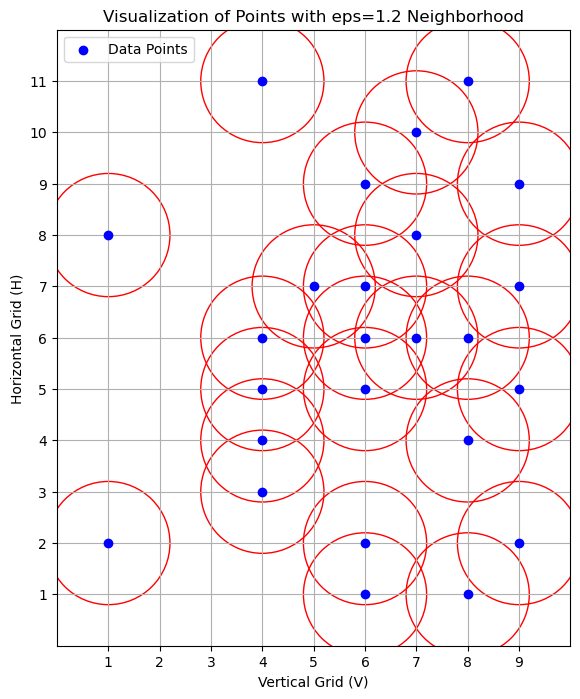

In [27]:
#Identifying the data grid points manually
import matplotlib.pyplot as plt

# Given points (H, V) - interpreting V as x-axis and H as y-axis
points = [
    (1, 4), (1, 8), (2, 7), (3, 6), (3, 9), (4, 1), (4, 7), (5, 5), (5, 6), (5, 9),
    (6, 4), (6, 6), (6, 7), (6, 8), (7, 4), (7, 6), (7, 9), (8, 4), (8, 8), (9, 4),
    (10, 1), (10, 6), (10, 9), (11, 6), (11, 8)
]

adjusted_points = [(v, 12-h) for h, v in points]  # Invert y-axis to match top-to-bottom numbering
V_coords, H_coords = zip(*adjusted_points)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(V_coords, H_coords, color='blue', zorder=2, label='Data Points')
eps_radius = 1.2

for (v, h) in adjusted_points:
    circle = plt.Circle((v, h), eps_radius, color='red', fill=False, zorder=1, linewidth=1)
    ax.add_patch(circle)
ax.set_xlim(0, 10)  # Adjust x-axis (vertical lines from 1 to 9)
ax.set_ylim(0, 12)  # Adjust y-axis (horizontal lines from 1 to 11)
ax.set_xticks(range(1, 10))  # Grid ticks on x-axis (vertical lines)
ax.set_yticks(range(1, 12))  # Grid ticks on y-axis (horizontal lines)
ax.grid(True)
ax.set_xlabel('Vertical Grid (V)')
ax.set_ylabel('Horizontal Grid (H)')
ax.set_title('Visualization of Points with eps=1.2 Neighborhood')
ax.set_aspect('equal', adjustable='box')
ax.legend()
plt.show()


In [41]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

#Final Points
points = [
    (1, 4), (1, 8), (2, 7), (3, 6), (3, 9), (4, 1), (4, 7), (5, 5), (5, 6), (5, 9),
    (6, 4), (6, 6), (6, 7), (6, 8), (7, 4), (7, 6), (7, 9), (8, 4), (8, 8), (9, 4),
    (10, 1), (10, 6), (10, 9), (11, 6), (11, 8)
]
adjusted_points = [(v, 12-h) for h, v in points]

points_array = np.array(adjusted_points)
eps_value = 1.2
min_samples_values = [2, 3, 4, 5]
results = []

for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    labels = dbscan.fit_predict(points_array)
    
    #core points
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    
    # number of clusters (ignoring noise points labeled as -1)
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_core_points = sum(core_samples_mask)
    num_border_points = sum((labels != -1) & (~core_samples_mask))
    
    results.append((min_samples, num_core_points, num_clusters, num_border_points))

print("Results for different MinPts values:")
print(f"{'MinPts':<10}{'Core Points':<15}{'Clusters':<10}{'Border Points':<15}")

for res in results:
    print(f"{res[0]:<10}{res[1]:<15}{res[2]:<10}{res[3]:<15}")


Results for different MinPts values:
MinPts    Core Points    Clusters  Border Points  
2         12             3         0              
3         5              2         5              
4         1              1         3              
5         0              0         0              


### Interpretation:
As MinPts increases we can see how all of the points belong to the same cluster as cluster aproches zero! As inverse is true.

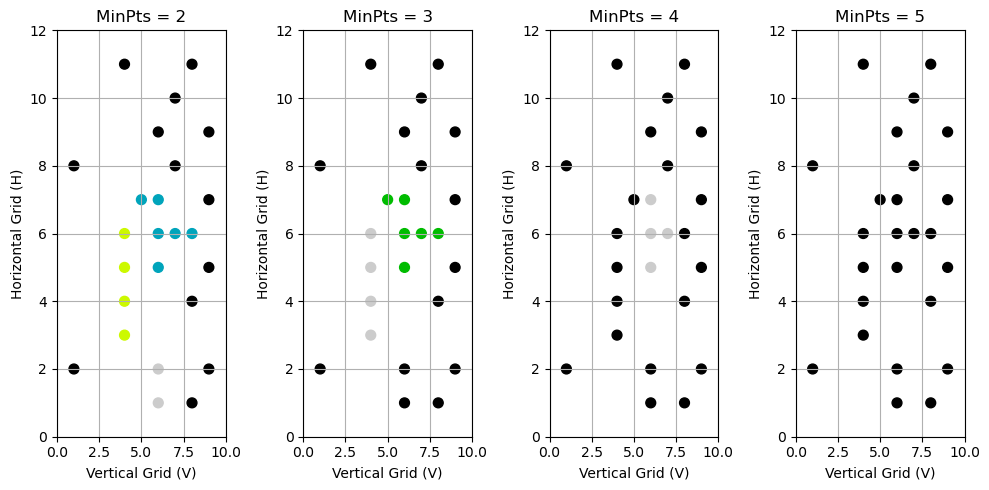

In [43]:
plt.figure(figsize=(10, 5))

for i, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples)
    labels = dbscan.fit_predict(points_array)
    
    plt.subplot(1, 4, i+1)
    plt.scatter(points_array[:, 0], points_array[:, 1], c=labels, cmap='nipy_spectral', s=50)
    plt.title(f'MinPts = {min_samples}')
    plt.xlabel('Vertical Grid (V)')
    plt.ylabel('Horizontal Grid (H)')
    plt.xlim(0, 10)
    plt.ylim(0, 12)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Interpretation:

Visualisation of how MinPts affects number of clusters, corepoints and borderpoints.

Last Image: All of the points belong to the same cluster as MinPts is 5!